<a href="https://colab.research.google.com/github/jittakorn-ch/DWDM21/blob/main/MiniExam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### ข้อสอบ

จาก data ```flights.csv``` และ ```airports.csv``` ใน https://drive.google.com/drive/folders/1EFo1_uQgWkRiXjezL0T4YwteYrsqU5MV?usp=sharing
0. หารัฐที่มีจำนวนเครื่องบินขาเข้ามากที่สุดและน้อยที่สุด
1. หารัฐที่มีจำนวนเครื่องบินขาออกมากที่สุดและน้อยที่สุด
2. วาด Histogram แสดงจำนวนเครื่องบินขาออกของแต่ละวันในสัปดาห์
3. สายการบินไหนมีเที่ยวบินมากที่สุดและน้อยที่สุด
4. สายการบินอะไรมีความล่าช้ามากที่สุดและน้อยที่สุด
5. ช่วงเช้าหรือช่วงบ่ายมีเครื่องบินขาเข้ามากกว่ากัน

ให้นักศึกษาทำข้อสอบ 2 ข้อจากที่แสดงข้างบนโดยกรอกรหัสนักศึกษาลงใน function ```gen_exams()``` แล้ว run เพื่อให้ได้ข้อสอบที่นักศึกษาต้องทำ 2 ข้อ (ข้อละ 3 คะแนน)
และให้นักศึกษาคิดโจทย์เองอีก 1 ข้อ (4 คะแนน)


In [1]:
import pandas as pd

In [2]:
from google.colab import drive 
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import os

In [4]:
flights = pd.read_csv('/content/drive/MyDrive/DWDM2021_DATA/flights.csv')
flights

,วันในเดือน,วันในสัปดาห์,สายการบิน,รหัสสนามบินต้นทาง,รหัสสนามบินปลายทาง,ความล่าช้าขาออก,ความล่าช้าขาเข้า
0,19,5,DL,11433,13303,-3,1
1,19,5,DL,14869,12478,0,-8
2,19,5,DL,14057,14869,-4,-15
3,19,5,DL,15016,11433,28,24
4,19,5,DL,11193,12892,-6,-11
...,...,...,...,...,...,...,...
2702213,19,6,DL,13204,14869,1,-3
2702214,19,6,DL,10397,13495,-2,-3
2702215,19,6,DL,10140,10397,18,9
2702216,19,6,DL,10397,13244,10,7


In [6]:
airports = pd.read_csv('/content/drive/MyDrive/DWDM2021_DATA/airports.csv')
airports

,รหัสสนามบิน,เมือง,รัฐ,ชื่อสนามบิน
0,10165,Adak Island,AK,Adak
1,10299,Anchorage,AK,Ted Stevens Anchorage International
2,10304,Aniak,AK,Aniak Airport
3,10754,Barrow,AK,Wiley Post/Will Rogers Memorial
4,10551,Bethel,AK,Bethel Airport
...,...,...,...,...
360,11233,Cheyenne,WY,Cheyenne Regional/Jerry Olson Field
361,11097,Cody,WY,Yellowstone Regional
362,11865,Gillette,WY,Gillette Campbell County
363,12441,Jackson,WY,Jackson Hole


In [7]:
def gen_exams(ID):
    import math
    a = int(ID[-1])%6
    b = int(ID[-1])%3
    print(f'รหัสนักศึกษา {ID} ทำข้อ {a} และ {b if a != b else 5-b}')

ตัวอย่างการ run

In [8]:
gen_exams('623021044-1')

รหัสนักศึกษา 623021044-1 ทำข้อ 1 และ 4


# เริ่มทำข้อสอบ

## ดูค่า Missing ของข้อมูล

In [9]:
flights.isnull().any()              ### เช็คว่า column ไหนมีค่าที่เป็นช่องว่าง

วันในเดือน            False
วันในสัปดาห์          False
สายการบิน             False
รหัสสนามบินต้นทาง     False
รหัสสนามบินปลายทาง    False
ความล่าช้าขาออก       False
ความล่าช้าขาเข้า      False
dtype: bool

ตาราง flights ไม่มีช่องว่าง

In [10]:
airports.isnull().any()          ### เช็คว่า column ไหนมีค่าที่เป็นช่องว่าง

รหัสสนามบิน    False
เมือง          False
รัฐ            False
ชื่อสนามบิน    False
dtype: bool

ตาราง airports ไม่มีช่องว่าง

## ต่อตาราง

### ต่อตารางต้นทาง

In [37]:
merged_table_airport = flights.merge(airports,how='left',left_on='รหัสสนามบินต้นทาง',right_on='รหัสสนามบิน')
merged_table_airport


### ตารางด้านซ้าย.merge(ตารางด้านขวา,how=เอาตารางไหนเป็นตารางหลัก,left_on=indexตารางซ้ายคืออะไรหรือคีร์ที่ใช้เชื่อม,right_on=indexตารางขวา)

,วันในเดือน,วันในสัปดาห์,สายการบิน,รหัสสนามบินต้นทาง,รหัสสนามบินปลายทาง,ความล่าช้าขาออก,ความล่าช้าขาเข้า,รหัสสนามบิน,เมือง,รัฐ,ชื่อสนามบิน
0,19,5,DL,11433,13303,-3,1,11433,Detroit,MI,Detroit Metro Wayne County
1,19,5,DL,14869,12478,0,-8,14869,Salt Lake City,UT,Salt Lake City International
2,19,5,DL,14057,14869,-4,-15,14057,Portland,OR,Portland International
3,19,5,DL,15016,11433,28,24,15016,St. Louis,MO,Lambert-St. Louis International
4,19,5,DL,11193,12892,-6,-11,11193,Cincinnati,OH,Cincinnati/Northern Kentucky International
...,...,...,...,...,...,...,...,...,...,...,...
2702213,19,6,DL,13204,14869,1,-3,13204,Orlando,FL,Orlando International
2702214,19,6,DL,10397,13495,-2,-3,10397,Atlanta,GA,Hartsfield-Jackson Atlanta International
2702215,19,6,DL,10140,10397,18,9,10140,Albuquerque,NM,Albuquerque International Sunport
2702216,19,6,DL,10397,13244,10,7,10397,Atlanta,GA,Hartsfield-Jackson Atlanta International


### ต่อตารางปลายทาง

In [36]:
merged_table_destination = flights.merge(airports,how='left',left_on='รหัสสนามบินปลายทาง',right_on='รหัสสนามบิน')
merged_table_destination

,วันในเดือน,วันในสัปดาห์,สายการบิน,รหัสสนามบินต้นทาง,รหัสสนามบินปลายทาง,ความล่าช้าขาออก,ความล่าช้าขาเข้า,รหัสสนามบิน,เมือง,รัฐ,ชื่อสนามบิน
0,19,5,DL,11433,13303,-3,1,13303,Miami,FL,Miami International
1,19,5,DL,14869,12478,0,-8,12478,New York,NY,John F. Kennedy International
2,19,5,DL,14057,14869,-4,-15,14869,Salt Lake City,UT,Salt Lake City International
3,19,5,DL,15016,11433,28,24,11433,Detroit,MI,Detroit Metro Wayne County
4,19,5,DL,11193,12892,-6,-11,12892,Los Angeles,CA,Los Angeles International
...,...,...,...,...,...,...,...,...,...,...,...
2702213,19,6,DL,13204,14869,1,-3,14869,Salt Lake City,UT,Salt Lake City International
2702214,19,6,DL,10397,13495,-2,-3,13495,New Orleans,LA,Louis Armstrong New Orleans International
2702215,19,6,DL,10140,10397,18,9,10397,Atlanta,GA,Hartsfield-Jackson Atlanta International
2702216,19,6,DL,10397,13244,10,7,13244,Memphis,TN,Memphis International


## 1.หารัฐที่มีจำนวนเครื่องบินขาออกมากที่สุดและน้อยที่สุด

In [38]:
flights_out = merged_table_airport.groupby('รัฐ').count().sort_values(by=['รหัสสนามบินต้นทาง'],ascending=False)
flights_out

,วันในเดือน,วันในสัปดาห์,สายการบิน,รหัสสนามบินต้นทาง,รหัสสนามบินปลายทาง,ความล่าช้าขาออก,ความล่าช้าขาเข้า,รหัสสนามบิน,เมือง,ชื่อสนามบิน
รัฐ,,,,,,,,,,
CA,380046,380046,380046,380046,380046,380046,380046,380046,380046,380046
TX,275503,275503,275503,275503,275503,275503,275503,275503,275503,275503
FL,208139,208139,208139,208139,208139,208139,208139,208139,208139,208139
IL,176939,176939,176939,176939,176939,176939,176939,176939,176939,176939
GA,148563,148563,148563,148563,148563,148563,148563,148563,148563,148563
NY,132823,132823,132823,132823,132823,132823,132823,132823,132823,132823
NC,104766,104766,104766,104766,104766,104766,104766,104766,104766,104766
AZ,100710,100710,100710,100710,100710,100710,100710,100710,100710,100710
CO,97259,97259,97259,97259,97259,97259,97259,97259,97259,97259


### รัฐที่มีจำนวนเครื่องบินขาออกมากที่สุด

In [39]:
flights_out.iloc[:1,:]

,วันในเดือน,วันในสัปดาห์,สายการบิน,รหัสสนามบินต้นทาง,รหัสสนามบินปลายทาง,ความล่าช้าขาออก,ความล่าช้าขาเข้า,รหัสสนามบิน,เมือง,ชื่อสนามบิน
รัฐ,,,,,,,,,,
CA,380046,380046,380046,380046,380046,380046,380046,380046,380046,380046


### รัฐที่มีจำนวนเครื่องบินขาออกน้อยที่สุด

In [40]:
flights_out.iloc[-1:,:]

,วันในเดือน,วันในสัปดาห์,สายการบิน,รหัสสนามบินต้นทาง,รหัสสนามบินปลายทาง,ความล่าช้าขาออก,ความล่าช้าขาเข้า,รหัสสนามบิน,เมือง,ชื่อสนามบิน
รัฐ,,,,,,,,,,
AK,7700,7700,7700,7700,7700,7700,7700,7700,7700,7700


## 4.สายการบินอะไรมีความล่าช้ามากที่สุดและน้อยที่สุด

### ความล่าช้าขาออก

In [50]:
flights_out_late = merged_table_airport.groupby('สายการบิน').sum().sort_values(by=['ความล่าช้าขาออก'],ascending=False)
flights_out_late

,วันในเดือน,วันในสัปดาห์,รหัสสนามบินต้นทาง,รหัสสนามบินปลายทาง,ความล่าช้าขาออก,ความล่าช้าขาเข้า,รหัสสนามบิน
สายการบิน,,,,,,,
WN,9069416,2224148,7479218113,7479670928,7396039,4786295,7479218113
UA,4534526,1117172,3696442493,3696227962,3593225,1478957,3696442493
AA,4582516,1138915,3666590707,3667157559,3480520,2068630,3666590707
DL,6042618,1496227,4704588171,4704944770,2839331,1069911,4704588171
EV,2500244,609708,1947891657,1948324921,2232713,1611792,1947891657
MQ,1791343,438317,1436563008,1436555297,1703863,1554529,1436563008
B6,1929553,482251,1523503806,1523228098,1538429,1174539,1523503806
OO,2532741,627150,2148200438,2147841909,1253594,1015433,2148200438
US,3682331,907384,2967740538,2967699689,1160616,915559,2967740538


#### สายการบินที่มีความล่าช้าขาออกมากที่สุด

In [42]:
flights_out_late.iloc[:1,:]

,วันในเดือน,วันในสัปดาห์,รหัสสนามบินต้นทาง,รหัสสนามบินปลายทาง,ความล่าช้าขาออก,ความล่าช้าขาเข้า,รหัสสนามบิน
สายการบิน,,,,,,,
WN,9069416,2224148,7479218113,7479670928,7396039,4786295,7479218113


#### สายการบินที่มีความล่าช้าขาออกน้อยที่สุด

In [43]:
flights_out_late.iloc[-1:,:]

,วันในเดือน,วันในสัปดาห์,รหัสสนามบินต้นทาง,รหัสสนามบินปลายทาง,ความล่าช้าขาออก,ความล่าช้าขาเข้า,รหัสสนามบิน
สายการบิน,,,,,,,
HA,276057,69647,227909708,227789070,26739,26708,227909708


### ความล่าช้าขาเข้า

In [44]:
flights_arrival_late = merged_table_airport.groupby('สายการบิน').sum().sort_values(by=['ความล่าช้าขาเข้า'],ascending=False)
flights_arrival_late

,วันในเดือน,วันในสัปดาห์,รหัสสนามบินต้นทาง,รหัสสนามบินปลายทาง,ความล่าช้าขาออก,ความล่าช้าขาเข้า,รหัสสนามบิน
สายการบิน,,,,,,,
WN,9069416,2224148,7479218113,7479670928,7396039,4786295,7479218113
AA,4582516,1138915,3666590707,3667157559,3480520,2068630,3666590707
EV,2500244,609708,1947891657,1948324921,2232713,1611792,1947891657
MQ,1791343,438317,1436563008,1436555297,1703863,1554529,1436563008
UA,4534526,1117172,3696442493,3696227962,3593225,1478957,3696442493
B6,1929553,482251,1523503806,1523228098,1538429,1174539,1523503806
DL,6042618,1496227,4704588171,4704944770,2839331,1069911,4704588171
OO,2532741,627150,2148200438,2147841909,1253594,1015433,2148200438
US,3682331,907384,2967740538,2967699689,1160616,915559,2967740538


#### สายการบินที่มีความล่าช้าขาเข้ามากที่สุด

In [45]:
flights_arrival_late.iloc[:1,:]

,วันในเดือน,วันในสัปดาห์,รหัสสนามบินต้นทาง,รหัสสนามบินปลายทาง,ความล่าช้าขาออก,ความล่าช้าขาเข้า,รหัสสนามบิน
สายการบิน,,,,,,,
WN,9069416,2224148,7479218113,7479670928,7396039,4786295,7479218113


#### สายการบินที่มีความล่าช้าขาเข้าน้อยที่สุด

In [46]:
flights_arrival_late.iloc[-1:,:]

,วันในเดือน,วันในสัปดาห์,รหัสสนามบินต้นทาง,รหัสสนามบินปลายทาง,ความล่าช้าขาออก,ความล่าช้าขาเข้า,รหัสสนามบิน
สายการบิน,,,,,,,
AS,1083297,270487,943746200,943764789,45194,-18654,943746200


## คิดโจทย์เอง 1 ข้อ

## เปรียบเทียบความล่าช้าของการบินในแต่ละวัน

In [52]:
merged_table_airport

,วันในเดือน,วันในสัปดาห์,สายการบิน,รหัสสนามบินต้นทาง,รหัสสนามบินปลายทาง,ความล่าช้าขาออก,ความล่าช้าขาเข้า,รหัสสนามบิน,เมือง,รัฐ,ชื่อสนามบิน
0,19,5,DL,11433,13303,-3,1,11433,Detroit,MI,Detroit Metro Wayne County
1,19,5,DL,14869,12478,0,-8,14869,Salt Lake City,UT,Salt Lake City International
2,19,5,DL,14057,14869,-4,-15,14057,Portland,OR,Portland International
3,19,5,DL,15016,11433,28,24,15016,St. Louis,MO,Lambert-St. Louis International
4,19,5,DL,11193,12892,-6,-11,11193,Cincinnati,OH,Cincinnati/Northern Kentucky International
...,...,...,...,...,...,...,...,...,...,...,...
2702213,19,6,DL,13204,14869,1,-3,13204,Orlando,FL,Orlando International
2702214,19,6,DL,10397,13495,-2,-3,10397,Atlanta,GA,Hartsfield-Jackson Atlanta International
2702215,19,6,DL,10140,10397,18,9,10140,Albuquerque,NM,Albuquerque International Sunport
2702216,19,6,DL,10397,13244,10,7,10397,Atlanta,GA,Hartsfield-Jackson Atlanta International


In [92]:
flights_day = merged_table_airport.groupby('วันในสัปดาห์')[['ความล่าช้าขาออก','ความล่าช้าขาเข้า']].sum()
flights_day

,ความล่าช้าขาออก,ความล่าช้าขาเข้า
วันในสัปดาห์,,
1,4425085,2882122
2,3424717,1742099
3,4187091,2907784
4,5534914,4366737
5,4879455,3448326
6,2372186,682229
7,3578842,1953993


In [93]:
### reset index เพื่อเอา index ไปใช้งานต่อ

flights_day.reset_index(inplace=True)
flights_day

,วันในสัปดาห์,ความล่าช้าขาออก,ความล่าช้าขาเข้า
0,1,4425085,2882122
1,2,3424717,1742099
2,3,4187091,2907784
3,4,5534914,4366737
4,5,4879455,3448326
5,6,2372186,682229
6,7,3578842,1953993


In [94]:
import numpy as np

# import เพื่อใช้งาน pyplot
from matplotlib import pyplot as plt

In [95]:
np.arange(len(flights_day.iloc[:,0]))

array([0, 1, 2, 3, 4, 5, 6])

No handles with labels found to put in legend.


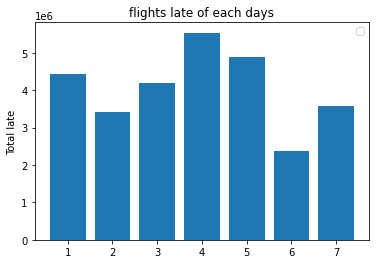

In [86]:
plt.bar(np.arange(len(flights_day.iloc[:,0])), flights_day.iloc[:,1])

plt.ylabel('Total late')
plt.title('flights late of each days')
plt.xticks(np.arange(len(flights_day.iloc[:,0])), flights_day.iloc[:,0],rotation=0)
plt.legend();

### เปรียบเทียบ late ขาเข้า กับ ขาออก

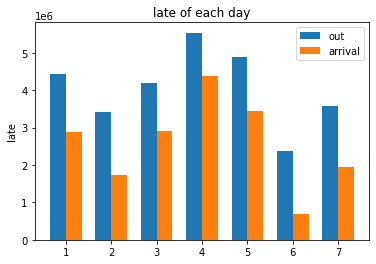

In [101]:
width =0.35

plt.bar(np.arange(len(flights_day.iloc[:,0])) - width/2, flights_day.iloc[:,1], width=width, label = 'out')
plt.bar(np.arange(len(flights_day.iloc[:,0])) + width/2, flights_day.iloc[:,2], width=width, label = 'arrival')

plt.ylabel('late')                         ### กำหนดชื่อแกน y
plt.title('late of each day')     ### กำหนดกราฟ
plt.xticks(np.arange(len(flights_day.iloc[:,0])), flights_day.iloc[:,0])              ### เปลี่ยนชื่อแท่ง
plt.legend();